The idea is to use the angle to differentiate drivers. A more agressive driver might drive through a curve faster than a more calm driver.

In [182]:
import DriverDataIO
import DriverChallengeHelperFunctions as dcHF
import DriverChallengeVisualization as dcVis
import AccelerationFeature
import numpy
import sklearn
import matplotlib.pyplot as plt

from math import *

pathToDriverData = '../../driverchallenge_data/drivers'

In [183]:
get_ipython().magic(u'matplotlib inline')

In [184]:
trip = DriverDataIO.get_trip(1,2,pathToDriverData)

In [185]:
print(len(trip))

561


the angle between 3 points (2 line segments) is $$ arcos(\frac{(P_{12}^2 + P_{23}^2 - P_{13}^2) }{ (2 \cdot P_{12} \cdot P_{23}))}) $$

In [186]:
def angle_feature(ctrip):
    angles = []
    angle_feature_elements = []
    for index,p in list(enumerate(ctrip)):
        current_angle = dcHF.get_angle(index, ctrip)
        angles.append(current_angle)

        if current_angle != -1:
            length0 = dcHF.distance(ctrip[index-1], p)
            length1 = dcHF.distance(p, ctrip[index+1])
            driven_distance = length0 + length1
            feature_value = driven_distance * current_angle;
            angle_feature_elements.append(feature_value)
        else:
            angle_feature_elements.append(-1)
            
    #dcVis.plot_speed(angles)        
    return angle_feature_elements


abusing plot speed 

In [187]:
angle_feature_elements = angle_feature(trip)

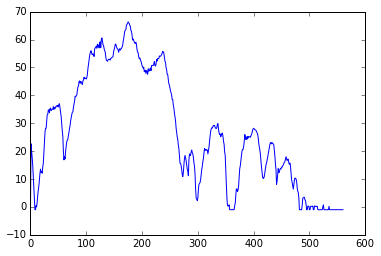

In [188]:
dcVis.plot_speed(angle_feature_elements)

In [189]:
drive_mean = numpy.mean(angle_feature_elements)
print drive_mean

26.8955008586


# computing feature for all drives

In [190]:
def one_driver_angle_feature(driverid):
    feature_array = []
    for i in range(1,201):
        _trip = DriverDataIO.get_trip(driverid,i, pathToDriverData)
        _angle_feature_elements = angle_feature(_trip)
        drive_mean = numpy.mean(_angle_feature_elements)

        feature_array.append((i, drive_mean))

    features = numpy.array(feature_array)


    return features

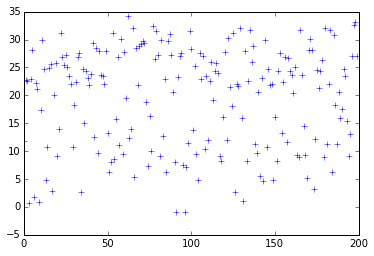

In [191]:
feature_array = one_driver_angle_feature(2)
ax = plt.plot([f[1:] for f in feature_array], '+')
    

# looks random, but let's try Elliptic Envelope

In [195]:
def find_outliers(_features):
    from sklearn import covariance
    clf = covariance.EllipticEnvelope(contamination=.1)
    
    clf.fit(_features)  
    y_pred = clf.decision_function(_features).ravel()

    # define a threshold for probabilities
    outliers_fraction = 0.02
    from scipy import stats
    threshold = stats.scoreatpercentile(y_pred, 100 * outliers_fraction)
    y_pred = y_pred > threshold
    
    return y_pred
    

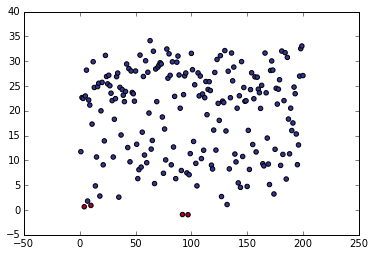

In [196]:
pred = find_outliers(feature_array)
plt.scatter([i[0] for i in features], [i[1] for i in features], c=pred, cmap='RdYlBu')

# now for more than one driver

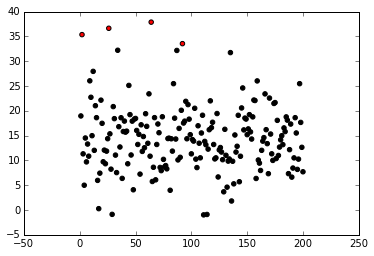

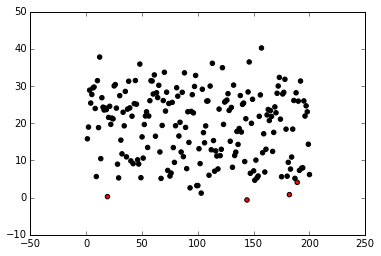

In [204]:
for d in range(10, 12):
    _feature_array = one_driver_angle_feature(d)
    _pred = find_outliers(_feature_array)

    f, axarr = plt.subplots(1, 1)

    plt.scatter([i[0] for i in _feature_array], [i[1] for i in _feature_array], c=_pred, cmap='flag')    